In [227]:
import matplotlib.pyplot as plt
import numpy as np

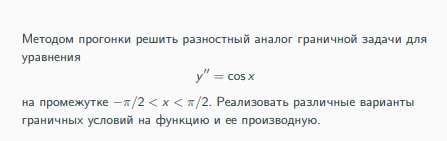 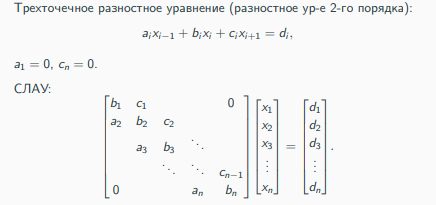

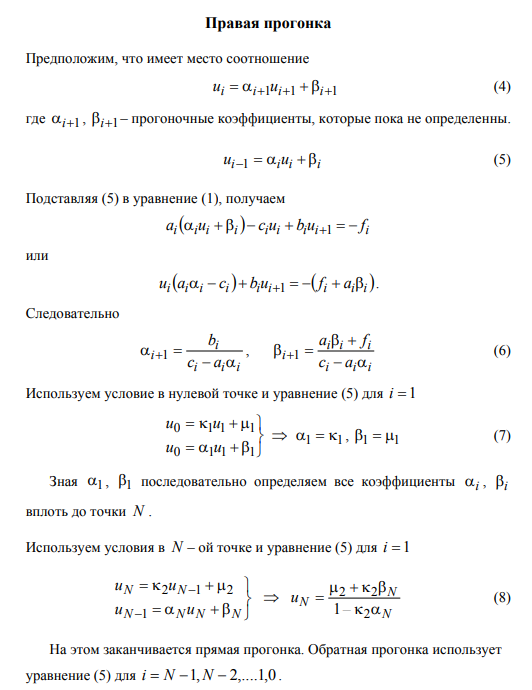

In [228]:
def solve_tridiagonal(a: np.array, b: np.array, c: np.array, d: np.array):
    n = len(d)
    if (len(a) != n - 1 or len(b) != n  or len(c) != n - 1):
        raise ValueError()
    
    ac, bc, cc, dc = map(np.array, (a, b, c, d)) 
    for i in range(1, n):

        if bc[i - 1] == 0:
            raise ValueError("Метод не применим или определитель равен нулю")
        
        mc = ac[i - 1] / bc[i - 1]
        bc[i] = bc[i] - mc * cc[i - 1]
        dc[i] = dc[i] - mc * dc[i - 1]

    
    xc = bc
    
    if bc[-1] == 0:
        raise ValueError("Метод не применим или определитель равен нулю")
    
    xc[-1] = dc[-1] / bc[-1]
    
    for i in range(n-2, -1, -1):
        xc[i] = (dc[i] - cc[i] * xc[i + 1]) / bc[i]

    return xc
    

In [229]:
def func(x):
    return np.cos(x)

$$f(x_i) \approx \frac{f_{i} - f_{i-1}}{h}$$
$$f(x_i) \approx \frac{f_{i+1} - f_{i}}{h}$$
$$f(x_i) \approx \frac{1}{h^2} \left( f_{i-1} - 2f_i + f_{i+1} \right)$$

In [230]:
def solve(func, left, right, k, N=20):
    h = (right - left) / (N - 1)
    x = np.linspace(left, right, N)
    
    a = np.zeros(N - 1)
    b = np.zeros(N)
    c = np.zeros(N - 1)
    d = func(x)

    # коэффициент перед y'' 
    a += h**-2
    b -= 2 / h**2
    c += h**-2
    

    # Левая граница
    b[0] = k[0][0] - k[0][1] / h
    c[0] = k[0][1] / h

    # Правая граница
    a[-1] = -k[1][1] / h
    b[-1] = k[1][0] + k[1][1] / h

    return solve_tridiagonal(a, b, c, d), x

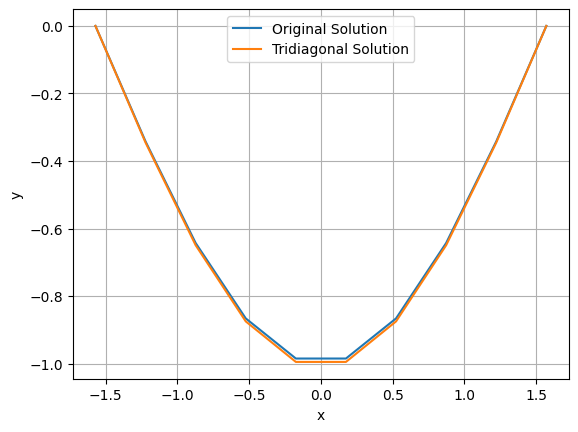

In [231]:
k = [[1, 0], [1, 0]]
y_inner, x = solve(func, left=-np.pi/2, right=np.pi/2, k=k, N=10)

plt.plot(x, -np.cos(x), label='Original Solution')
plt.plot(x, y_inner, label='Tridiagonal Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [232]:
k = [[1, 0], [1, 0]]
y_inner, X = solve(func, left=-np.pi/2, right=np.pi/2, k=k, N=10)
acurate_solution = [-np.cos(x) for x in X]

print(max([abs(y_inner[i] - acurate_solution[i]) for i in range(len(X))]))

0.010060870422943125


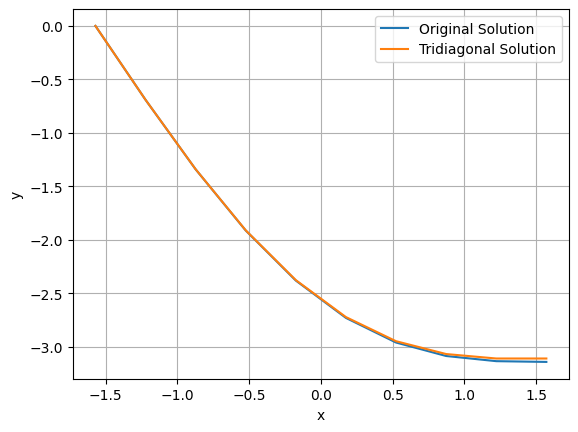

In [233]:
k = [[1, 0], [0, 1]]
y_inner, x = solve(func, left=-np.pi/2, right=np.pi/2, k=k, N=10)

plt.plot(x, -np.cos(x) - x - np.pi/2, label='Original Solution')
plt.plot(x, y_inner, label='Tridiagonal Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [234]:
k = [[1, 0], [0, 1]]
y_inner, X = solve(func, left=-np.pi/2, right=np.pi/2, k=k, N=1000)
acurate_solution = [(-np.cos(x) - x - np.pi/2) for x in X]

print(max([abs(y_inner[i] - acurate_solution[i]) for i in range(len(X))]))

2.589028412103289e-06
